## Primary Data Profiling

#### So whille looking at the data in the excel sheet we could easily guess that this data is about a store, which have different type of products and is serving in different countries. The store have have different regular customers which could easily be seen by looking at the customer ids in excel, and as mentioned above store have different products which have a unique stock code.
#### So basically it could be think of as, data about the trading of different products of a store which serves in diffrent countries and have many regular customers

In [1]:
# importing the required libraries and importing the dataset
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
dataset = pd.read_csv('../MISSION Machine Learning Datasets/kaggledata.csv', header= 0,
                        encoding= 'unicode_escape')

In [2]:
# printing the first five rows
dataset.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# checking the datatype and no. of entries in each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null object
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
# As the no. of entries in CustomerId columns are too less and can't be filled with the given data
# Therefore dropping those values
dataset.dropna(axis = 0, subset = ['CustomerID'], inplace = True)

In [5]:
# Again checking if the above line of code worked
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      406829 non-null object
StockCode      406829 non-null object
Description    406829 non-null object
Quantity       406829 non-null int64
InvoiceDate    406829 non-null object
UnitPrice      406829 non-null float64
CustomerID     406829 non-null float64
Country        406829 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [6]:
# checking out the columns with datatype as int and float and different values for those columns
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [7]:
# Replacing the negative values of quantity with Nan as quantity can't be negative
dataset[dataset['Quantity'] < 0] = np.nan
dataset.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [8]:
# Added one more column to calculate the money spent per row to data
dataset['total_dollars'] = dataset['Quantity']*dataset['UnitPrice']
dataset.describe()

,Quantity,UnitPrice,CustomerID,total_dollars
count,397924.000000,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171,22.394749
std,180.420210,22.096788,1713.169877,309.055588
min,1.000000,0.000000,12346.000000,0.000000
25%,2.000000,1.250000,13969.000000,4.680000
50%,6.000000,1.950000,15159.000000,11.800000
75%,12.000000,3.750000,16795.000000,19.800000
max,80995.000000,8142.750000,18287.000000,168469.600000


In [9]:
# Looking for the no. of unique customers
dataset['CustomerID'].nunique()

4339

In [10]:
# checking the numeric description of no. of orders with customer ids 
invoice = dataset.groupby(by='CustomerID', as_index=False)['InvoiceNo'].count()
invoice.columns = ['CustomerID', 'NumberOrders']
invoice.describe()

,CustomerID,NumberOrders
count,4339.000000,4339.000000
mean,15299.936852,91.708689
std,1721.889758,228.792852
min,12346.000000,1.000000
25%,13812.500000,17.000000
50%,15299.000000,41.000000
75%,16778.500000,100.000000
max,18287.000000,7847.000000


In [11]:
# displaying the different products, no. od transactions, and different customers
pd.DataFrame([{'products': len(dataset['StockCode'].value_counts()),    
               'transactions': len(dataset['InvoiceNo'].value_counts()),
               'customers': len(dataset['CustomerID'].value_counts()),  
              }], columns = ['products', 'transactions', 'customers'], index = ['quantity'])

,products,transactions,customers
quantity,3665,18536,4339


In [12]:
# showing the no. of products purchased with each transaction
temp = dataset.groupby(by=['CustomerID', 'InvoiceNo'], as_index=False)['InvoiceDate'].count()
nb_products_per_basket = temp.rename(columns = {'InvoiceDate':'Number of products'})
nb_products_per_basket.sort_values('CustomerID')

,CustomerID,InvoiceNo,Number of products
0,12346.0,541431,1
1,12347.0,537626,31
2,12347.0,542237,29
3,12347.0,549222,24
4,12347.0,556201,18
...,...,...,...
18523,18283.0,557956,87
18532,18283.0,580872,50
18534,18287.0,570715,38
18533,18287.0,554065,29


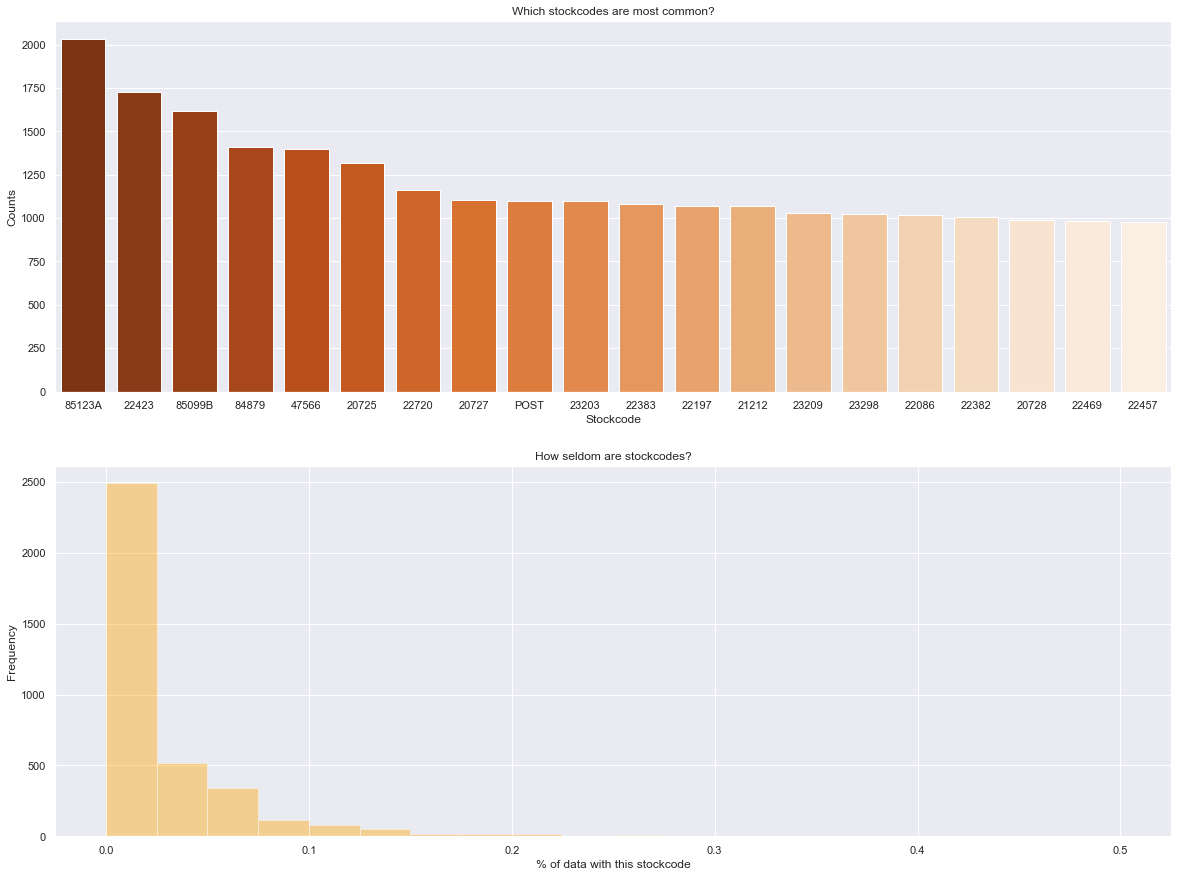

In [17]:
# plotting the product which is picked mostly by the customers and less by the customers
stockcode_counts = dataset.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?");
sns.distplot(np.round(stockcode_counts/dataset.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Orange")
ax[1].set_title("How seldom are stockcodes?")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency");

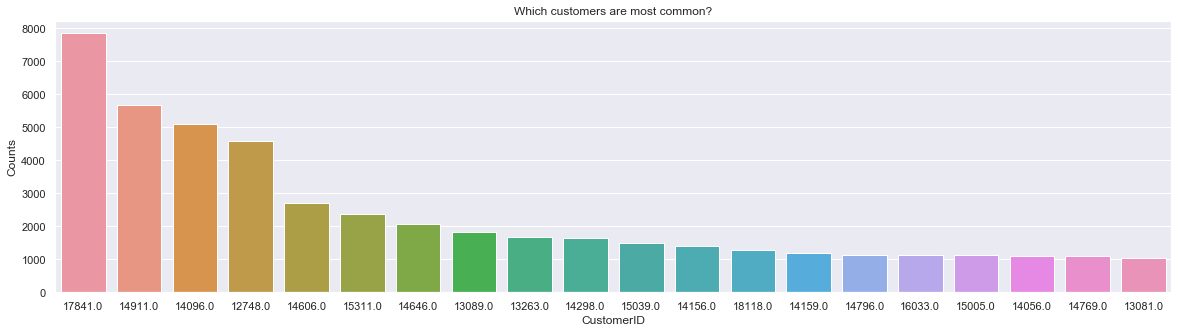

In [18]:
# plotting the customers which are most common by looking at the no. of items purchased by them
customer_counts = dataset.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index)
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");

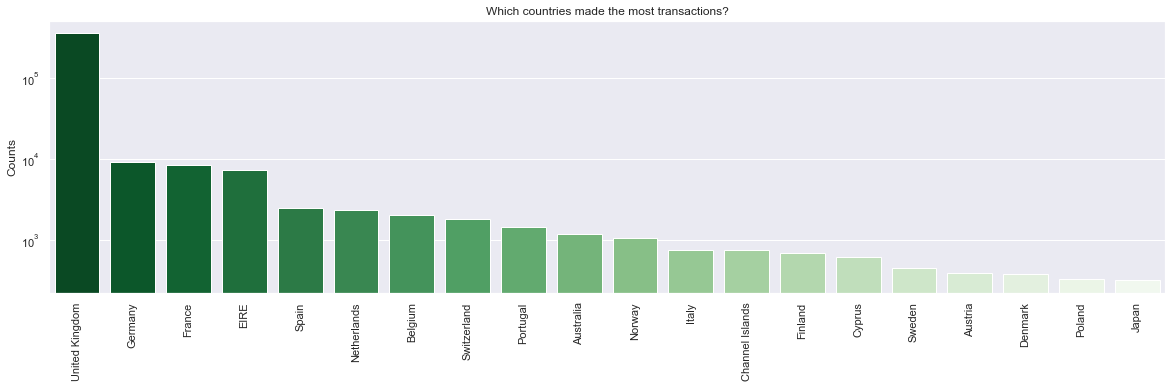

In [19]:
# plot showing the country which made the most no. of transactions
country_counts = dataset.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

## Insights from the data

### As we have performed many data pre-processing steps to make data fit for visualisation and finally we are with three plots..
#### Plot-1 First plot present in cell no. 17
##### This plot tells us about the product that is very common among the customers i.e. the product is picked by the most number of customers and secondly it also shows the product picked less by the customers, So with the business point of view the product which has frequent sale and the one with not so frequent sale, and if those two have any kind of relation with each other, so the store people could give an offer by making a combo of these two products in case to increase the sale of the less picked one.

#### Plot-2 Second plot present in cell no. 19
##### This plot tells the store people about their loyal customers, so with business point of view for making good relations with their customers, the store could give some kind of offers to their regular or loyal customers, it will influence the other customers for buying products from their store and strenthen the bond with the customers.

#### Plot-3 Third plot present in cell no. 20
##### This plot tells about the State in which the store is working good. So from this store people could think of like they have eastablished their name in that particular State and have to focus on other states more to estabish themself there.